In [2]:
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd
from nltk import ngrams
import nltk
from nltk.corpus import stopwords
# nltk.download('words')
# nltk.download('stopwords')
stopwords = stopwords.words('english')
import io
import spacy
#nlp = spacy.load('en', disable=['parser'])
nlp = spacy.load('en')



import matplotlib.pyplot as plt
%matplotlib inline

### Tokenize the text using Spacy

In [3]:
def get_words_list_season(season):
    token_list = []
    with io.open(r'SiliconValley/filtered_subtitles/S%s/S%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        for line in f:
            doc = nlp(line)
            for token in doc:
                token_list.append(token)
    return token_list
                
token_list_season = get_words_list_season('01')
            

def get_words_list_all():
    all_token_list = []
    season_list = [format(i, '02d') for i in range(1, 5)] 
    for season in season_list:
        token_list = get_words_list_season(season)
        all_token_list.extend(token_list)
    return all_token_list 
        
all_token_list = get_words_list_all()                                             
    


filter the stopwords, filter the punctuation, filter the human name, filter the interjection

In [4]:
name_list = ['richard', 'gavin', 'hooli', 'gregory', 'jared', 'perter', 'erlich', 'dinesh', 'belson', 'monica', 'peter']

words_list = []
for token in token_list_season:
    lower = token.text.lower()
    if token.is_punct == False and token.is_space == False and token.is_digit == False and token.pos_ != 'INTJ':
        if lower not in stopwords and "'" not in lower and lower not in name_list and token.lemma_ != '-PRON-':
            words_list.append(token.text.lower())

cnt = Counter(words_list)

print(cnt.most_common(50))

[('know', 228), ('like', 146), ('right', 136), ('pied', 102), ('think', 102), ('guys', 101), ('piper', 101), ('get', 94), ('got', 88), ('go', 87), ('mean', 87), ('one', 82), ('gon', 81), ('na', 81), ('going', 80), ('would', 78), ('really', 77), ('peter', 70), ('could', 70), ('see', 69), ('need', 66), ('company', 64), ('look', 60), ('let', 60), ('good', 58), ('want', 57), ('back', 55), ('time', 52), ('fuck', 51), ('big', 51), ('great', 51), ('ca', 49), ('something', 48), ('fucking', 47), ('dollars', 47), ('even', 47), ('better', 46), ('come', 45), ('guy', 44), ('shit', 43), ('man', 42), ('name', 42), ('make', 41), ('take', 41), ('actually', 41), ('head', 40), ('lot', 40), ('people', 39), ('way', 38), ('maybe', 38)]

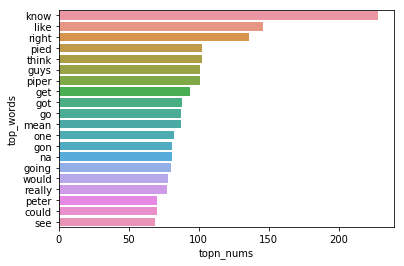

In [5]:
def plot_word_count():
    topn = 20
    cnt = Counter(words_list)
    most_common = cnt.most_common(topn)
    top_words = [each[0] for each in most_common]
    topn_nums = [each[1] for each in most_common]
    df = pd.DataFrame(dict(top_words=top_words, topn_nums=topn_nums))
    
 
    ax = sns.barplot(x="topn_nums", y="top_words", data=df)

plot_word_count()

### N-grams .
first of all, make a list of lists where each internal list is a sentence that is tokenized into words.

In [54]:
def get_sents_list_season(season):
    sents_list = []
    with io.open(r'SiliconValley/filtered_subtitles/S%s/S%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        lines = f.read()
        lines = lines.replace('\n', ' ')
        
        doc = nlp(lines)
        for sent in doc.sents:
            #print('each sent', sent)
            if len(sent) > 0:
                sents_list.append(sent)
                
    sents_token_list = []
    for sent in sents_list:
        token_list = [token for token in sent]
        sents_token_list.append(token_list)
        
    return sents_token_list


def get_sents_list_all():
    sents_token_list_all = []
    season_list = [format(i, '02d') for i in range(1, 5)] 
    for season in season_list:
        sents_token_list_season = get_sents_list_season(season)
        sents_token_list_all.extend(sents_token_list_season)
        
    return sents_token_list_all

sents_token_list_all = get_sents_list_all()
#sents_token_list_season = get_sents_list_season('01')

In [55]:
sents_token_list = sents_token_list_all
sentences = [[token.text.lower() for token in sent if token.is_punct==False and token.is_space==False] for sent in sents_token_list]

def analyze_ngrams(n):
    cnt = Counter()
    for sent in sentences:
        if len(sent) >= n:
            cnt.update(" ".join(n) for n in ngrams(sent, n))
    
    print(cnt.most_common(20))
    return cnt


cnt = analyze_ngrams(4)



[("i do n't know", 125), ("i 'm gon na", 85), ("i 'm going to", 54), ("i do n't think", 45), ("we 're gon na", 38), ("you 're gon na", 38), ("i do n't want", 33), ("do n't want to", 33), ('what are you doing', 29), ('what do you mean', 28), ("'re not gon na", 27), ('world a better place', 24), ("you 're going to", 24), ("do n't have to", 23), ('the world a better', 23), ("why do n't you", 22), ("i 'd like to", 21), ("you do n't have", 21), ("i 'm not going", 21), ("we 're going to", 21)]

[("i do n't", 354), ("do n't know", 142), ("i 'm not", 135), ("i 'm sorry", 123), ("you do n't", 116), ("it 's a", 115), ('you know what', 97), ("i 'm gon", 85), ("'m gon na", 85), ("it 's not", 84), ("i did n't", 82), ('what the fuck', 81), ("'re gon na", 81), ("i ca n't", 80), ('a lot of', 77), ('what do you', 76), ("you 're not", 68), ("do n't think", 62), ("it 's just", 62), ('what are you', 62)]

[("i do n't", 354), ("do n't know", 142), ("i 'm not", 135), ("i 'm sorry", 123), ("you do n't", 116), ("it 's a", 115), ('you know what', 97), ("i 'm gon", 85), ("'m gon na", 85), ("it 's not", 84)]

[("i do n't know", 125), ("i 'm gon na", 85), ("i 'm going to", 54), ("i do n't think", 45), ("we 're gon na", 38), ("you 're gon na", 38), ("i do n't want", 33), ("do n't want to", 33), ('what are you doing', 29), ('what do you mean', 28), ("'re not gon na", 27), ('world a better place', 24), ("you 're going to", 24), ("do n't have to", 23), ('the world a better', 23), ("why do n't you", 22), ("i 'd like to", 21), ("you do n't have", 21), ("i 'm not going", 21), ("we 're going to", 21)]

[("i do n't know", 125), ("i 'm gon na", 85), ("i 'm going to", 54), ("i do n't think", 45), ("we 're gon na", 38), ("you 're gon na", 38), ("i do n't want", 33), ("do n't want to", 33), ('what are you doing', 29), ('what do you mean', 28)]

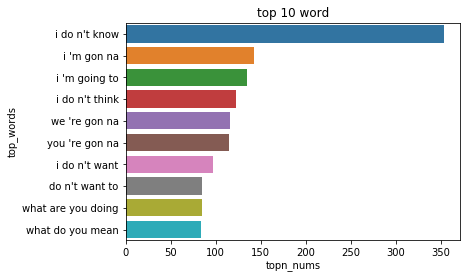

In [62]:

def plot_ngram(N, top_n):
    cnt = analyze_ngrams(N)
    topn_list = cnt.most_common(top_n)
    topn_words = [each[0] for each in topn_list]
    print(topn_list)
    topn_nums = [each[1] for each in topn_list]
    # print(topn_nums)
    
    df = pd.DataFrame(dict(top_words=topn_words, topn_nums=topn_nums))
    g = sns.barplot(x="topn_nums", y="top_words", data=df)
    g.set_title('top %s %s grams' % (top_n, N))

    
    
plot_ngram(3, 10)


[("i do n't know", 125), ("i 'm gon na", 85), ("i 'm going to", 54), ("i do n't think", 45), ("we 're gon na", 38), ("you 're gon na", 38), ("i do n't want", 33), ("do n't want to", 33), ('what are you doing', 29), ('what do you mean', 28), ("'re not gon na", 27), ('world a better place', 24), ("you 're going to", 24), ("do n't have to", 23), ('the world a better', 23), ("why do n't you", 22), ("i 'd like to", 21), ("you do n't have", 21), ("i 'm not going", 21), ("we 're going to", 21)]

[("i do n't know", 125), ("i 'm gon na", 85), ("i 'm going to", 54), ("i do n't think", 45), ("we 're gon na", 38), ("you 're gon na", 38), ("i do n't want", 33), ("do n't want to", 33), ('what are you doing', 29), ('what do you mean', 28)]

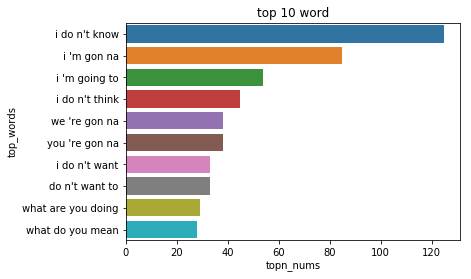

In [63]:
plot_ngram(4, 10)

### Sentence length.

In [69]:
import random


length_list = [len(s) for s in sentences]
df = pd.DataFrame(dict(length=length_list, sentence=sentences))
long_sents = list(df[df.length > 45].sentence)

def define_len_range(x):
    len_range = ''
    if x <= 10:
        len_range = '[0, 10]'
    elif x > 10 and x <= 20:
        len_range = '(10,20]'
    elif x > 20 and x <= 30:
        len_range = '(20,30]'
    elif x > 30 and x <= 40:
        len_range = '(30,40]'
    elif x > 40 and x <= 50:
        len_range = '(40,50]'
    else:
        len_range = '[50,999)'
    return len_range

df['len_range'] = df.length.apply(define_len_range)
print(df['len_range'].value_counts())

print('below is some of the sentences that has more than 45 words')
for s in random.sample(long_sents, 5):
    print(' '.join(s))
    






[0, 10]     19203
(10,20]      3556
(20,30]       819
(30,40]       142
(40,50]        34
[50,999)        8
Name: len_range, dtype: int64

below is some of the sentences that has more than 45 words

look when it blows up and it will once it reaches a critical mass of users pied piper will be able to search the whole world of recorded music to find out if there 's a match to see if you 're infringing on any copy righted material

so you are going to go in your little fucking piggy bank right now and pay back every fucking kopeck that you stole from big head and if you do n't we 're gon na take our little show on the road perhaps perform it for a man named the d.a. ridiculous

In [65]:
import numpy as np

print('words of the loggest sentence: %s' % max(length_list))
print('words of the average sentence: %s' % np.mean(length_list))

words of the loggest sentence: 89

words of the average sentence: 6.736259574109924

from the sentence length analysis , we can see that most common length of sentence is under 10 words, at 19203 sentences, which is far more than sentences for over 10 words.  On the other hand, The longest sentence contains 89 words in total , while the average of words of sentences are 6.7 words.